In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Define world
map_size = 128
occupancy_map = np.zeros([map_size, map_size])
# Populating occupancy map
occupancy_map[0].fill(1)
occupancy_map.T[0].fill(1)
occupancy_map[map_size-1].fill(1)
occupancy_map.T[map_size-1].fill(1)

for i in range(0, 64):
    occupancy_map[i][64] = 1
for i in range(0, 32):
    occupancy_map[64][i] = 1
for i in range(96, 128):
    occupancy_map[i][64] = 1
for i in range(80, 112):
    occupancy_map[36][i] = 1
occupancy_map

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

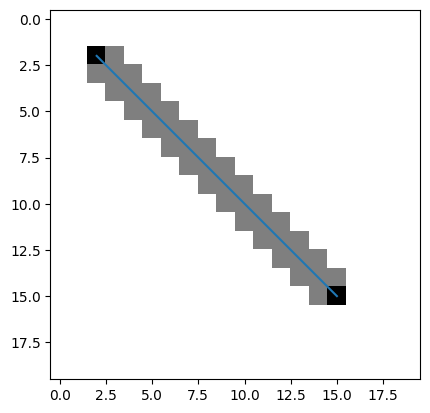

In [24]:
# Test of modified Bresenham line algorithm 
# for detecting path intersections with occupancy grid
def modBresenhamTest(point1, point2, grid):
    # Algorithm
    ystep, xstep = 0, 0
    error = 0
    errorprev = 0
    ddx, ddy = 0, 0
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]
    x, y = point1[0], point1[1]
    grid[x][y] = 1

    if dy < 0:
        ystep = -1
        dy = -dy
    else:
        ystep = 1
    
    if dx < 0:
        xstep = -1
        dx = -dx
    else:
        xstep = 1

    ddy = 2 * dy
    ddx = 2 * dx
    if ddx >= ddy:
        errorprev = error = dx
        for i in range(0, dx, 1):
            x += xstep
            error += ddy
            if error > ddx:
                y += ystep
                error -= ddx
                if error + errorprev < ddx:
                    grid[x][y-ystep] = 1
                elif error + errorprev > ddx:
                    grid[x-xstep][y] = 1
                else:
                    grid[x-xstep][y] = 1
                    grid[x][y-ystep] = 1
            grid[x][y] = 1
            errorprev = error
    else:
        errorprev = error = dy
        for i in range(0, dy, 1):
            y += ystep
            error += ddx
            if error > ddy:
                x += xstep
                error -= ddy
                if error + errorprev < ddy:
                    grid[x-xstep][y] = 1
                elif error + errorprev > ddy:
                    grid[x][y-ystep] = 1
                else:
                    grid[x-xstep][y] = 1
                    grid[x][y-ystep] = 1
            grid[x][y] = 1
            errorprev = error

    # Plot
    grid[point1[0]][point1[1]] = 2
    grid[point2[0]][point2[1]] = 2
    
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap="binary")
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]])
    plt.show()

point1 = np.array([2, 2])
point2 = np.array([15, 15])
grid = np.zeros([20, 20])
modBresenhamTest(point1, point2, grid)

In [25]:
class RRTGraph:
    def __init__(self):
        self.V = []
        self.E = []

    def genRandomPoint(self):
        return np.random.rand(2) * occupancy_map[0].size

    def addVertex(self, vertex):
        self.V.append(vertex)
        return len(self.V) - 1
    
    def nearest(self, vertex):
        min_val = math.inf
        closest_index = None
        for i, v in enumerate(self.V):
            if np.linalg.norm(v - vertex) < min_val:
                min_val = np.linalg.norm(v - vertex)
                closest_index = i
        if closest_index != None:
            return closest_index
        raise Exception("Graph was not populated with starting node")
    
    def addNewLink(self, new_vertex_pos, nearest_vertex_index):
        new_vertex_index = self.addVertex(new_vertex_pos)
        self.E.append([nearest_vertex_index, new_vertex_index])

    def checkCollision(self, occupancy_map, point1, point2):
        ystep, xstep = 0, 0
        error = 0
        errorprev = 0
        ddx, ddy = 0, 0
        dx = point2[0] - point1[0]
        dy = point2[1] - point1[1]
        x, y = point1[0], point1[1]

        if dy < 0:
            ystep = -1
            dy = -dy
        else:
            ystep = 1
        
        if dx < 0:
            xstep = -1
            dx = -dx
        else:
            xstep = 1

        ddy = 2 * dy
        ddx = 2 * dx
        if ddx >= ddy:
            errorprev = error = dx
            for i in range(0, dx, 1):
                x += xstep
                error += ddy
                if error > ddx:
                    y += ystep
                    error -= ddx
                    if error + errorprev < ddx:
                        if occupancy_map[x][y-ystep]:
                            return True
                    elif error + errorprev > ddx:
                        if occupancy_map[x-xstep][y]:
                            return True
                    else:
                        if occupancy_map[x-xstep][y] or occupancy_map[x][y-ystep]:
                            return True
                if occupancy_map[x][y]:
                    return True
                errorprev = error
        else:
            errorprev = error = dy
            for i in range(0, dy, 1):
                y += ystep
                error += ddx
                if error > ddy:
                    x += xstep
                    error -= ddy
                    if error + errorprev < ddy:
                        if occupancy_map[x-xstep][y]:
                            return True
                    elif error + errorprev > ddy:
                        if occupancy_map[x][y-ystep]:
                            return True
                    else:
                        if occupancy_map[x-xstep][y] or occupancy_map[x][y-ystep]:
                            return True
                if occupancy_map[x][y]:
                    return True
                errorprev = error

        return False
    
graph = RRTGraph()
graph.checkCollision(occupancy_map, [4, 2], [4, 10])

False

In [26]:
# Visulize RRT Algorithm - TODO: Fix the shit out of it. Visualizes the occupancy map incorrectly (transposed i think)
def visRRT(occupancy_map, start_node, graph):
    fig, ax = plt.subplots()
    
    # Occupancy map
    ax.imshow(occupancy_map.T, cmap="binary")
    # Edges in graph
    for e in graph.E:
        ax.plot([graph.V[e[0]][0], graph.V[e[1]][0]], [graph.V[e[0]][1], graph.V[e[1]][1]], color="lightblue")
    # Verticies in graph
    [vertex_x, vertex_y] = np.array(graph.V).T
    ax.scatter(vertex_x, vertex_y, s=10)
    # Start point
    ax.plot(start_node[0], start_node[1], 'ro')
    plt.show()

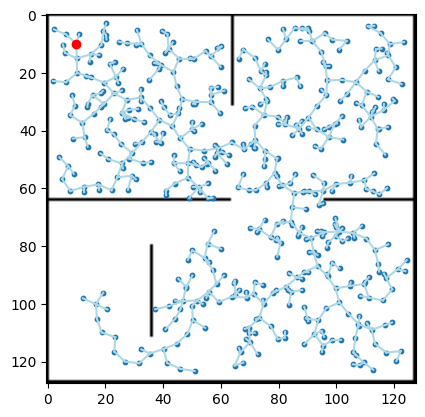

[array([10, 10]), array([10.11495236, 14.99867842]), array([10.22855792, 19.99738763]), array([14.97859411, 21.55852703]), array([19.62589148, 23.40314817]), array([22.99570172, 27.09697802]), array([27.4212074 , 29.42397167]), array([32.32869251, 28.46658466]), array([35.52900357, 32.3082001 ]), array([38.71516409, 36.16155982]), array([35.93941548, 40.320312  ]), array([32.61078654, 44.05129436]), array([43.15793249, 38.45542315]), array([45.93777705, 42.61143857]), array([45.30827695, 33.94144278]), array([49.25430893, 46.35317831]), array([29.27598091, 47.77675694]), array([46.63609883, 29.12097714]), array([48.65685165, 51.31735446]), array([48.60084366, 56.31704076]), array([54.21998348, 46.93805113]), array([52.3798846 , 59.59100618]), array([55.56322608, 63.4466951 ]), array([25.80610467, 51.37675122]), array([59.14807712, 46.0931292 ]), array([44.68299368, 24.51821924]), array([43.65749323, 51.23725808]), array([24.18462075, 56.10652816]), array([22.16310487, 60.6796533 ]), ar

In [30]:
def RRT(start, occupancy_map, max_iterations=20, max_length=10):
    # Create new graph
    graph = RRTGraph()
    #Initilize the graph with start-position
    graph.addVertex(start)

    # Run RRT algorithm
    iteration = 0
    while iteration < max_iterations:
        # Get random position in map
        rand_pos = graph.genRandomPoint()
        rand_closest_cell = rand_pos.astype(int)
        # If cell is in obstacle, find new position 
        if occupancy_map[rand_closest_cell[0]][rand_closest_cell[1]]: 
            continue

        # Find nearest vertex in graph
        nearest_vertex_index = graph.nearest(rand_pos)
        nearest_vertex = graph.V[nearest_vertex_index]

        # If nearest vertex is farther away than max_length 
        if np.linalg.norm(nearest_vertex - rand_pos) > max_length:
            # Generate new point at dist=max_length away from nearest vertex
            new_vertex = nearest_vertex + max_length * (rand_pos - nearest_vertex) / np.linalg.norm(nearest_vertex - rand_pos)
        else:
            new_vertex = rand_pos

        # Check if the path from the nearest to the current vertex would intersect with obstacles
        if graph.checkCollision(occupancy_map, nearest_vertex.astype(int), new_vertex.astype(int)):
            continue

        # Create link between nearest vertex and this cell position
        graph.addNewLink(new_vertex, nearest_vertex_index)
        # if iteration % 49 == 0:
        #     visRRT(occupancy_map, start, graph)
        iteration += 1

    return graph

# Define start
start = np.array([10, 10])

# Run algorithm
complete_graph = RRT(start, occupancy_map, max_iterations=500, max_length=5)
visRRT(occupancy_map, start, complete_graph)
print(complete_graph.V)